<a href="https://colab.research.google.com/github/ntxuan1799/Aboriginal-Project/blob/main/wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
df = pd.read_csv("merged_socialmedia_data_cleaned.csv")

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [ ]:
#Remove comment word
words_to_remove = [
    'people', 'voice', 'yes', 'indigenous', 'vote', 'referendum',
    'government', 'australia', 'australians', 'voted',
    'hold', 'tight', 'checking', 'permissions', 'loading', 'content',
    'register', 'subscribe', 'continue', 'reading', 'article', 'memberlog',
    'mcpherson', 'media', 'group', 'delivered', 'weekly', 'wednesday'
]

stop_words = set(stopwords.words('english'))

def clean_text(text):
    if not isinstance(text, str):
        return ""
    tokens = word_tokenize(text)
    filtered = [
        w.lower() for w in tokens
        if w.lower() not in stop_words and w.lower() not in words_to_remove
    ]
    return " ".join(filtered)

df['Content'] = df['Content'].apply(clean_text)

/tmp/ipython-input-51-624429426.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')


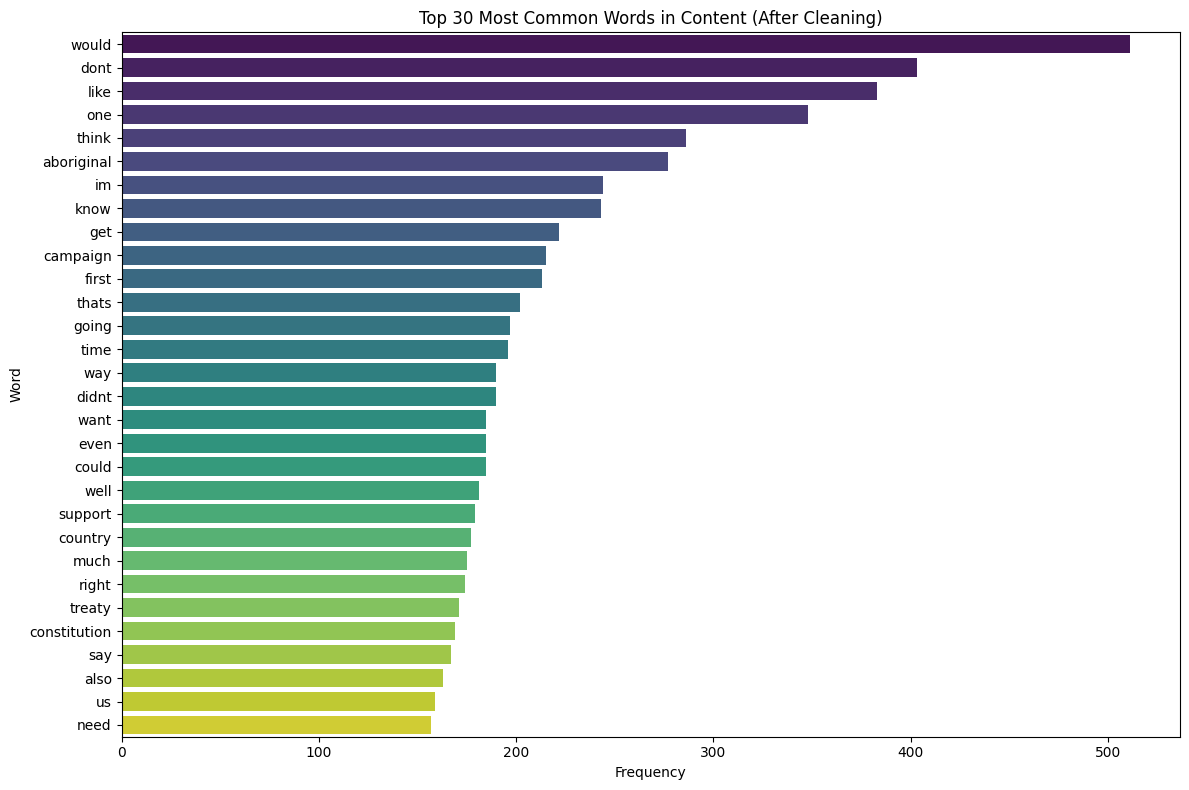

In [ ]:
all_words = ' '.join(df['Content']).split()
word_counts = Counter(all_words)
most_common_words = word_counts.most_common(30)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Plot overall top 30
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=common_words_df, palette='viridis')
plt.title('Top 30 Most Common Words in Content (After Cleaning)')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.tight_layout()
plt.show()

In [ ]:
rows = []

for (source, period), group_df in df.groupby(['Source', 'Period']):
    counts = Counter(" ".join(group_df['Content']).split())
    for word, count in counts.most_common(10):
        rows.append({
            'Source': source,
            'Period': period,
            'Word': word,
            'Count': count
        })

In [ ]:
word_count_df = pd.DataFrame(rows, columns=['Source','Period','Word','Count'])

# Print the DataFrame
print(word_count_df)


             Source  Period            Word  Count
0    Benalla Ensign   After         federal      9
1    Benalla Ensign   After            indi      9
2    Benalla Ensign   After  articlealready      9
3    Benalla Ensign   After        election      6
4    Benalla Ensign   After       scheduled      3
..              ...     ...             ...    ...
185         YouTube  Before             one      7
186         YouTube  Before            even      7
187         YouTube  Before          voting      6
188         YouTube  Before           first      6
189         YouTube  Before      aboriginal      6

[190 rows x 4 columns]


In [ ]:
df.to_csv("word_cloud.csv", index=False)

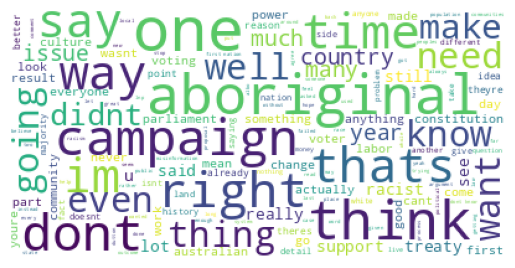

In [ ]:
from wordcloud import WordCloud
corpus = list(df['Content'])

wordcloud = WordCloud(background_color='white', max_words=200, max_font_size=50, random_state=42).generate(str(corpus))

fig = plt.figure(1)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()